<a href="https://colab.research.google.com/github/agulhane090398/PythonViz/blob/main/Tensorflow_and_Keras_1_Jan26_Batch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

!wget "https://drive.google.com/uc?export=download&id=1GVhrh2rH6hUunV4Tf7lQoSFsqov9aPjU" -O healthyfime.csv

--2026-01-31 01:47:41--  https://drive.google.com/uc?export=download&id=1GVhrh2rH6hUunV4Tf7lQoSFsqov9aPjU
Resolving drive.google.com (drive.google.com)... 172.253.63.101, 172.253.63.138, 172.253.63.100, ...
Connecting to drive.google.com (drive.google.com)|172.253.63.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1GVhrh2rH6hUunV4Tf7lQoSFsqov9aPjU&export=download [following]
--2026-01-31 01:47:41--  https://drive.usercontent.google.com/download?id=1GVhrh2rH6hUunV4Tf7lQoSFsqov9aPjU&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.62.132, 2607:f8b0:4004:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.62.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 761835 (744K) [application/octet-stream]
Saving to: ‘healthyfime.csv’

healthyfime.csv     100%[===================>] 743.98K  --.-KB/s

In [ ]:
df = pd.read_csv("healthyfime.csv")
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [ ]:
df.replace({"M":0, "F":1} , inplace = True)
df.head()

/tmp/ipython-input-1045767759.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"M":0, "F":1} , inplace = True)


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [ ]:
classes = list(df['class'].unique())
mapping_dict = { ch : i for i, ch in enumerate(sorted(classes, reverse=True)) }
print (mapping_dict)
df['class'].replace(mapping_dict , inplace = True)
df.head()

{'D': 0, 'C': 1, 'B': 2, 'A': 3}


/tmp/ipython-input-3995772334.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['class'].replace(mapping_dict , inplace = True)
/tmp/ipython-input-3995772334.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'].replace(mapping_dict , inplace = True)


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,1
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,3
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,1
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,2
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,2


<Axes: >

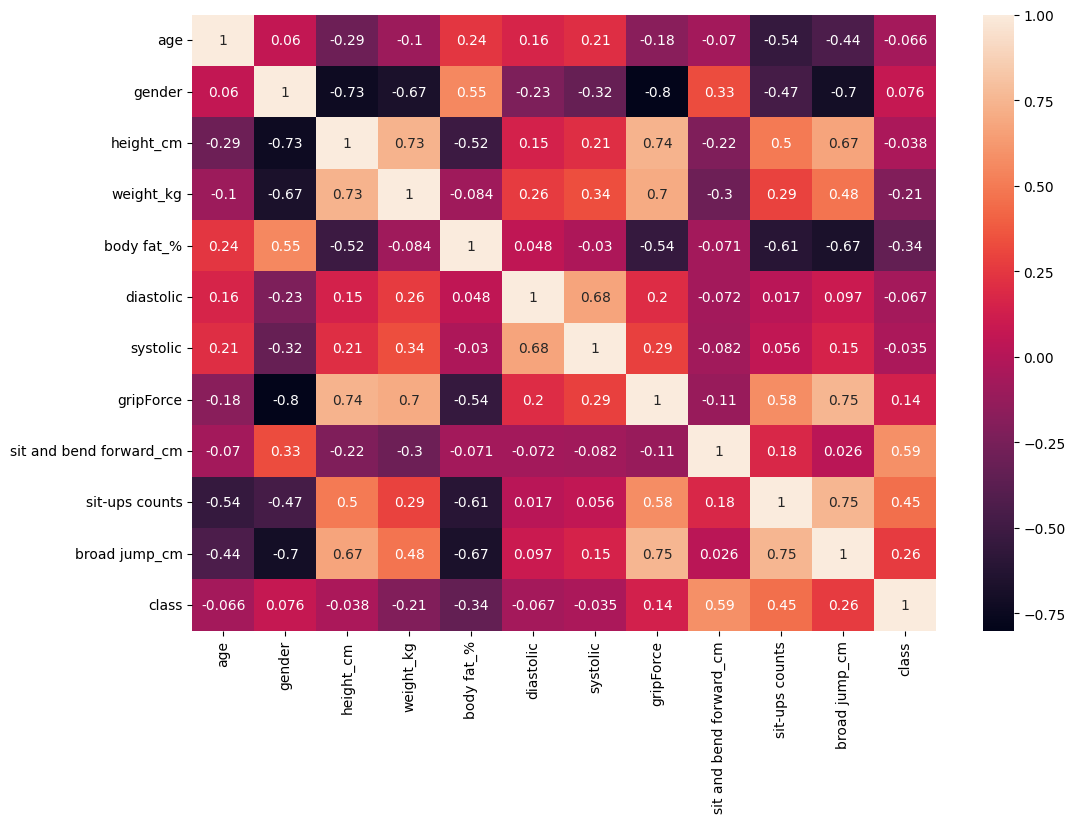

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True)

<Axes: >

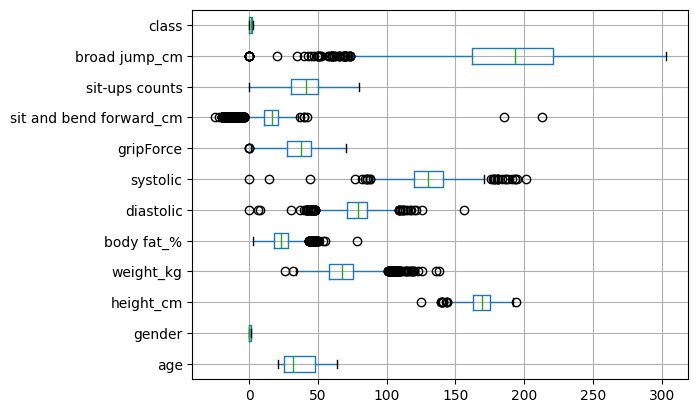

In [ ]:
df.boxplot(rot = 0, vert=False)

In [ ]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]
print(X.shape, y.shape)

(13393, 11) (13393,)


In [ ]:
from sklearn.model_selection import train_test_split

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.1, random_state=42)

print('Train : ', X_train.shape, y_train.shape)
print('Valid : ', X_val.shape, y_val.shape)
print('Test  : ', X_test.shape, y_test.shape)

Train :  (10847, 11) (10847,)
Valid :  (1206, 11) (1206,)
Test  :  (1340, 11) (1340,)


<Axes: >

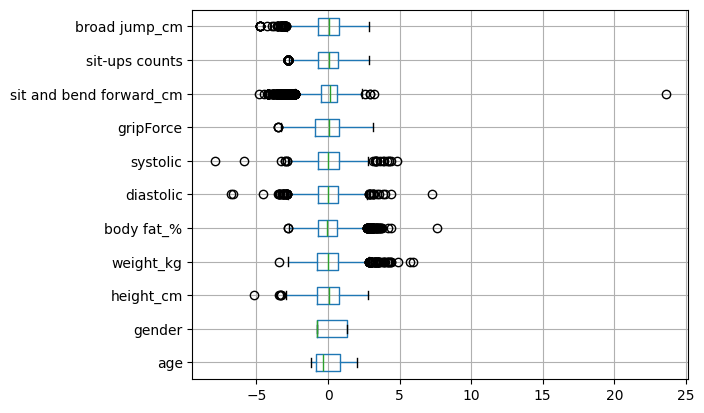

In [ ]:
#Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train,y_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

pd.DataFrame(X_train,columns=df.columns[:-1]).boxplot(rot = 0, vert=False)

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.19.0'

In [ ]:
dir(tf.keras)

['DTypePolicy',
 'FloatDTypePolicy',
 'Function',
 'Initializer',
 'Input',
 'InputSpec',
 'KerasTensor',
 'Layer',
 'Loss',
 'Metric',
 'Model',
 'Operation',
 'Optimizer',
 'Quantizer',
 'Regularizer',
 'RematScope',
 'Sequential',
 'StatelessScope',
 'SymbolicScope',
 'Variable',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'activations',
 'applications',
 'backend',
 'callbacks',
 'config',
 'constraints',
 'datasets',
 'device',
 'distribution',
 'dtype_policies',
 'export',
 'initializers',
 'layers',
 'legacy',
 'losses',
 'metrics',
 'mixed_precision',
 'models',
 'name_scope',
 'ops',
 'optimizers',
 'preprocessing',
 'quantizers',
 'random',
 'regularizers',
 'remat',
 'tree',
 'utils',
 'version',
 'visualization',
 'wrappers']

In [ ]:
dir(tf.keras.activations)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'celu',
 'deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'glu',
 'hard_shrink',
 'hard_sigmoid',
 'hard_silu',
 'hard_swish',
 'hard_tanh',
 'leaky_relu',
 'linear',
 'log_sigmoid',
 'log_softmax',
 'mish',
 'relu',
 'relu6',
 'selu',
 'serialize',
 'sigmoid',
 'silu',
 'soft_shrink',
 'softmax',
 'softplus',
 'softsign',
 'sparse_plus',
 'sparse_sigmoid',
 'sparsemax',
 'squareplus',
 'swish',
 'tanh',
 'tanh_shrink',
 'threshold']

In [ ]:
dir(tf.keras.datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'boston_housing',
 'california_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(16, activation='relu', input_shape=(11,), name= "hidden_1"),
    Dense(32, activation='relu', name= "hidden_2"),

    Dense(4, activation='softmax', name="output")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
for i in model.weights:
  print(i.shape)

(11, 16)
(16,)
(16, 32)
(32,)
(32, 4)
(4,)


In [ ]:
#learnable parameters = 11*16 + 16 +16*4 + 4

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 16)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 868 (3.39 KB)

 Trainable params: 868 (3.39 KB)

 Non-trainable params: 0 (0.00 B)

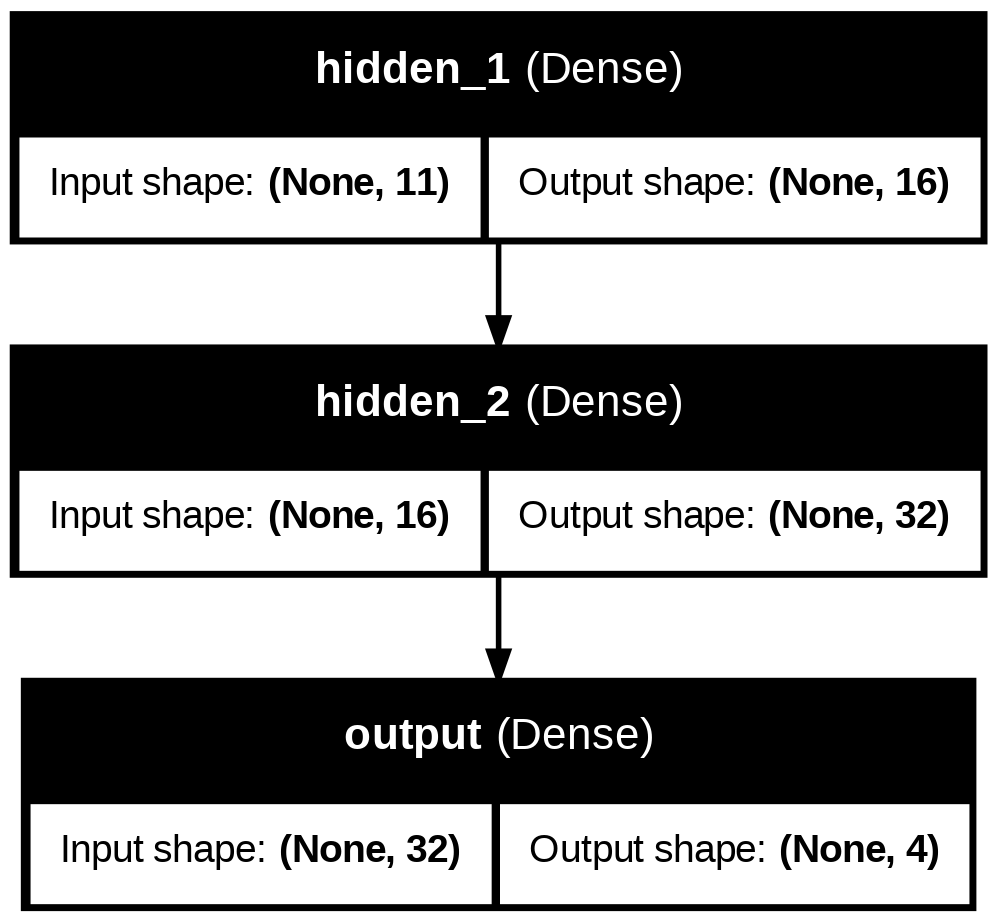

In [ ]:
#optional
from tensorflow.keras.utils import plot_model

plot_model(model,
    to_file='model.png',
    show_shapes=True, show_layer_names=True)

In [ ]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(11,),  kernel_initializer='random_uniform', bias_initializer="zeros", name= "hidden_1"),
    Dense(4, activation='softmax',kernel_initializer='he_uniform', bias_initializer='ones', name="output")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


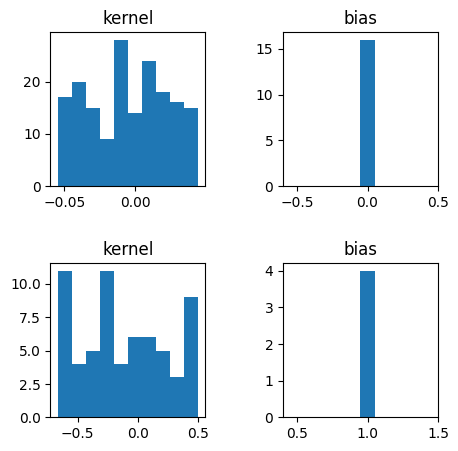

In [ ]:
# Plot histograms of weight and bias values
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(5,5))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# get the weights from the layers
weight_layers = [layer for layer in model.layers]

for i, layer in enumerate(weight_layers):
    for j in [0, 1]:
        axes[i, j].hist(layer.weights[j].numpy().flatten(), align='left')
        axes[i, j].set_title(layer.weights[j].name)

In [ ]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(11,), name= "hidden_1"),
    Dense(4, activation='softmax', name="output")
])

In [ ]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
model.fit(X_train, y_train, batch_size=256, validation_split=0.1, verbose=1, epochs=100)

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2839 - loss: 1.4464 - val_accuracy: 0.3641 - val_loss: 1.3368
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3795 - loss: 1.3198 - val_accuracy: 0.4359 - val_loss: 1.2377
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4467 - loss: 1.2239 - val_accuracy: 0.4627 - val_loss: 1.1651
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4835 - loss: 1.1511 - val_accuracy: 0.4959 - val_loss: 1.1080
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5120 - loss: 1.1020 - val_accuracy: 0.5088 - val_loss: 1.0636
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5260 - loss: 1.0524 - val_accuracy: 0.5336 - val_loss: 1.0273
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5519 - loss: 1.0050 - val_accuracy: 0.5456 - val_loss: 0.9988
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5617 - loss: 0.9881 - val_accuracy: 0.5585 - v

In [ ]:
## no of iterations: ( 10847 (training size) - 1084.7 (validation split) )/(256) == 39


model.fit(X_train, y_train, batch_size=256, validation_split=0.1, verbose=1, epochs=100)

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7018 - loss: 0.7126 - val_accuracy: 0.7198 - val_loss: 0.7103
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6969 - loss: 0.7143 - val_accuracy: 0.7171 - val_loss: 0.7092
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7071 - loss: 0.7043 - val_accuracy: 0.7161 - val_loss: 0.7075
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7048 - loss: 0.7075 - val_accuracy: 0.7171 - val_loss: 0.7070
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7060 - loss: 0.7054 - val_accuracy: 0.7143 - val_loss: 0.7060
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7107 - loss: 0.7008 - val_accuracy: 0.7152 - val_loss: 0.7042
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7140 - loss: 0.6929 - val_accuracy: 0.7207 - val_loss: 0.7030
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7187 - loss: 0.6906 - val_accuracy: 0.7207 - 

In [ ]:
#Next class ---> Evaluation